In [ ]:
pip install matplotlib


In [ ]:
def create_client_datasets(trainset):
    client_datasets = []

    # Client 1: Classes 0-5 (80%) and 5-10 (20%)
    client1_indices = []
    for class_label in range(0, 6):  # Classes 0 to 5
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client1_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(5, 10):  # Classes 5 to 10
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client1_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client1_indices))

    # Client 2: Classes 5-10 (80%) and 0-5 (20%)
    client2_indices = []
    for class_label in range(5, 10):  # Classes 5 to 10
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client2_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(0, 6):  # Classes 0 to 5
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client2_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client2_indices))

    # Client 3: Classes 0-3 (80%) and 4-10 (20%)
    client3_indices = []
    for class_label in range(0, 4):
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client3_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(4, 10):
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client3_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client3_indices))

    # Client 4: Classes 4-8 (80%) and 0-3 (20%)
    client4_indices = []
    for class_label in range(4, 10):  # Classes 4 to 8
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client4_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(0, 4):
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client4_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client4_indices))

    # Create Client 5: Classes 7-10 (80%) and 0-6 (20%)
    client5_indices = []
    for class_label in range(7, 11):  # Classes 7 to 10
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client5_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(0, 7):
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client5_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client5_indices))

    return client_datasets

In [ ]:
def print_class_counts_and_plot(client_datasets, original_dataset):
    targets_array = np.array(original_dataset.targets)

    for client_index, dataset in enumerate(client_datasets):
        targets = targets_array[dataset.indices]
        class_counts = np.bincount(targets, minlength=10)
        print(f"Client {client_index + 1} class-wise counts:")
        for class_label, count in enumerate(class_counts):
            print(f"Class {class_label}: {count} samples")

        plt.figure()
        plt.bar(range(10), class_counts, color='b', alpha=0.7)
        plt.title(f'Client {client_index + 1} Class Distribution')
        plt.xlabel('Class Label')
        plt.ylabel('Count')
        plt.xticks(range(10))
        plt.grid(axis='y')
        plt.show()
        print("")

###Client with more smaple of certain class assign less weight

####Weights inversely proporsional to class count

Files already downloaded and verified
Files already downloaded and verified
Client 1 class-wise counts:
Class 0: 4000 samples
Class 1: 4000 samples
Class 2: 4000 samples
Class 3: 4000 samples
Class 4: 4000 samples
Class 5: 5000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 samples
Class 9: 1000 samples


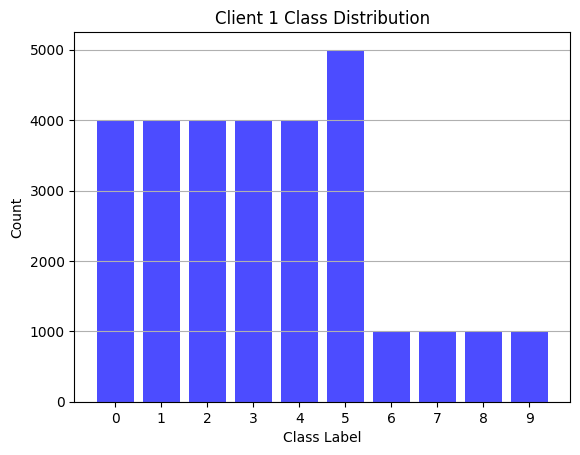


Client 2 class-wise counts:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 5000 samples
Class 6: 4000 samples
Class 7: 4000 samples
Class 8: 4000 samples
Class 9: 4000 samples


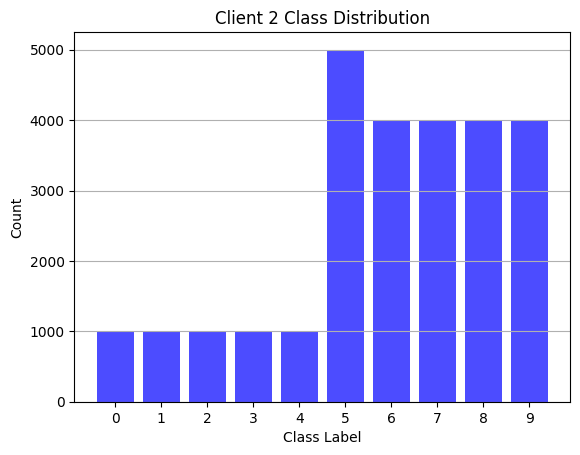


Client 3 class-wise counts:
Class 0: 4000 samples
Class 1: 4000 samples
Class 2: 4000 samples
Class 3: 4000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 samples
Class 9: 1000 samples


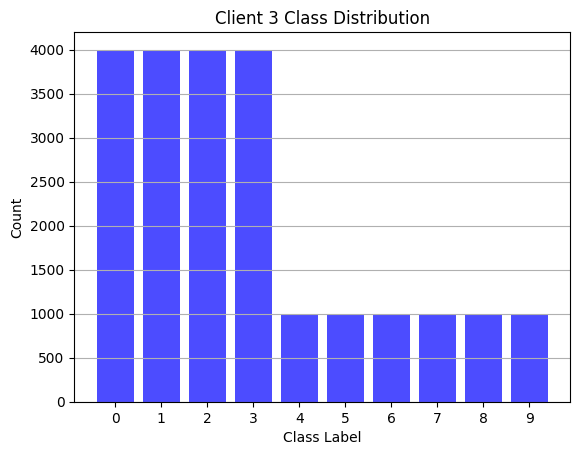


Client 4 class-wise counts:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 4000 samples
Class 5: 4000 samples
Class 6: 4000 samples
Class 7: 4000 samples
Class 8: 4000 samples
Class 9: 4000 samples


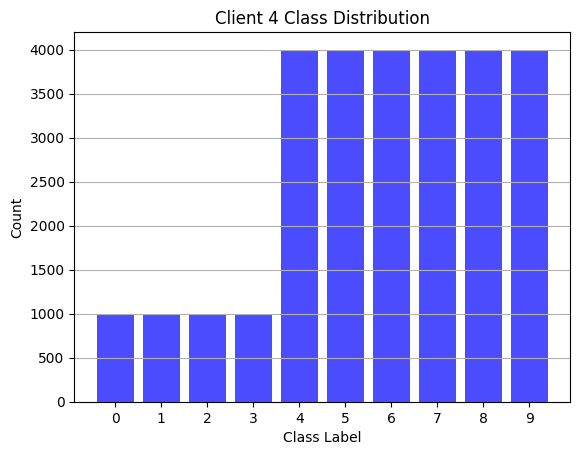


Client 5 class-wise counts:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 4000 samples
Class 8: 4000 samples
Class 9: 4000 samples


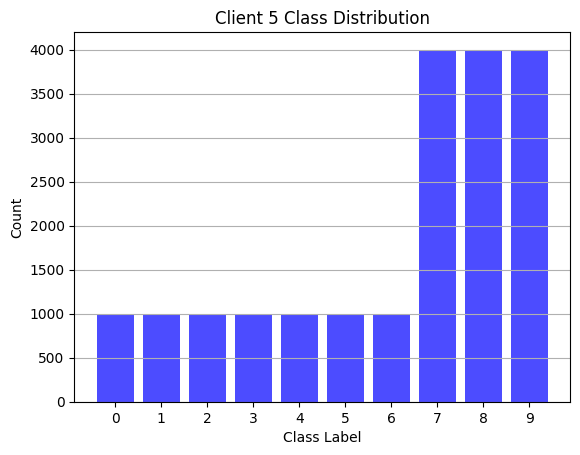


Round 1/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0328, Test Accuracy: 0.2622

Round 2/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0294, Test Accuracy: 0.3352

Round 3/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0274, Test Accuracy: 0.3771

Round 4/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0254, Test Accuracy: 0.4205

Round 5/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0241, Test Accuracy: 0.4544

Round 6/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0238, Test Accuracy: 0.4535

Round 7/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0229, Test Accuracy: 0.4828

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import copy
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Subset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)

        # Dynamically calculate the size after the convolutional layers
        self.flatten_size = self._get_flatten_size()

        self.fc1 = nn.Linear(self.flatten_size, 128)
        self.fc2 = nn.Linear(128, 10)

    # Helper function to calculate the flattened size after conv and pool layers
    def _get_flatten_size(self):
        x = torch.randn(1, 3, 32, 32)  # CIFAR-10 input size (batch_size=1, 3x32x32 image)
        x = self.pool(nn.functional.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(nn.functional.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        return x.view(1, -1).size(1)  # Flatten the tensor and return the size

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.pool(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Federated averaging function
def fed_avg(global_model, client_models, n_clients):
    global_dict = global_model.state_dict()
    for key in global_dict.keys():
        global_dict[key] = torch.stack([client_models[i].state_dict()[key].float() for i in range(n_clients)], 0).mean(0)
    global_model.load_state_dict(global_dict)
    return global_model

# Train model on client's data using weighted cross-entropy
def train(model, train_loader, class_weights, epochs=5, lr=0.01):
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    model.train()

    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset)
    return test_loss, accuracy



test_losses1 = []
test_accuracies1 = []
def print_class_counts_and_plot(client_datasets, original_dataset):
    targets_array = np.array(original_dataset.targets)

    for client_index, dataset in enumerate(client_datasets):
        targets = targets_array[dataset.indices]
        class_counts = np.bincount(targets, minlength=10)
        print(f"Client {client_index + 1} class-wise counts:")
        for class_label, count in enumerate(class_counts):
            print(f"Class {class_label}: {count} samples")

        plt.figure()
        plt.bar(range(10), class_counts, color='b', alpha=0.7)
        plt.title(f'Client {client_index + 1} Class Distribution')
        plt.xlabel('Class Label')
        plt.ylabel('Count')
        plt.xticks(range(10))
        plt.grid(axis='y')
        plt.show()
        print("")


def federated_learning():

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

    client_datasets = create_client_datasets(trainset)
    print_class_counts_and_plot(client_datasets, trainset)

    client_loaders = [data.DataLoader(dataset, batch_size=64, shuffle=True) for dataset in client_datasets]

    global_model = CNN()


    n_rounds = 10
    for round in range(n_rounds):
        print(f"Round {round + 1}/{n_rounds}")
        i=0;
        client_models = []
        for client_loader in client_loaders:
            print(f'Training client {i+1}')
            client_model = copy.deepcopy(global_model)

            class_counts = np.bincount(np.array(client_loader.dataset.dataset.targets)[client_loader.dataset.indices], minlength=10)
            total_samples = len(client_loader.dataset)
            class_weights = total_samples / (len(class_counts) * class_counts)
            class_weights = torch.FloatTensor(class_weights).to(client_model.parameters().__next__().device)

            train(client_model, client_loader, class_weights, epochs=1)
            client_models.append(client_model)
            i+=1

        global_model = fed_avg(global_model, client_models, len(client_loaders))
        test_loader = data.DataLoader(testset, batch_size=64, shuffle=False)
        criterion = nn.CrossEntropyLoss()
        test_loss, accuracy = test(global_model, test_loader,criterion)
        test_losses1.append(test_loss)
        test_accuracies1.append(accuracy)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}\n")


if __name__ == "__main__":
    federated_learning()


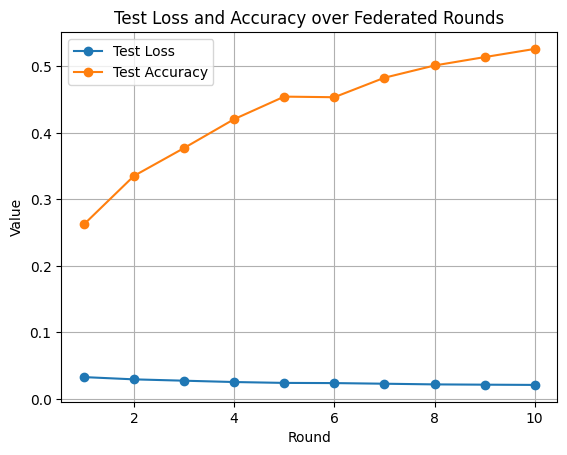

In [ ]:
rounds = range(1, 11)
plt.figure()
plt.plot(rounds, test_losses1, label='Test Loss', marker='o')
plt.plot(rounds, test_accuracies1, label='Test Accuracy', marker='o')
plt.title('Test Loss and Accuracy over Federated Rounds')
plt.xlabel('Round')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

###Client with more smaple of certain class assign more weight

####Weights directly proportional to class count

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import copy
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Subset

# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)

        self.flatten_size = self._get_flatten_size()

        self.fc1 = nn.Linear(self.flatten_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def _get_flatten_size(self):
        x = torch.randn(1, 3, 32, 32)
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        return x.view(1, -1).size(1)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.pool(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def fed_avg(global_model, client_models, n_clients):
    global_dict = global_model.state_dict()
    for key in global_dict.keys():
        global_dict[key] = torch.stack([client_models[i].state_dict()[key].float() for i in range(n_clients)], 0).mean(0)
    global_model.load_state_dict(global_dict)
    return global_model

def train(model, train_loader, class_weights, epochs=5, lr=0.01):
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    model.train()

    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset)
    return test_loss, accuracy

test_losses2=[]
test_accuracies2=[]
def create_client_datasets(trainset):
    client_datasets = []

    #  Client 1: Classes 0-5 (80%) and 5-10 (20%)
    client1_indices = []
    for class_label in range(0, 6):  # Classes 0 to 5
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client1_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(5, 10):  # Classes 5 to 10
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client1_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client1_indices))

    # Client 2: Classes 5-10 (80%) and 0-5 (20%)
    client2_indices = []
    for class_label in range(5, 10):  # Classes 5 to 10
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client2_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(0, 6):  # Classes 0 to 5
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client2_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client2_indices))

    # Client 3: Classes 0-3 (80%) and 4-10 (20%)
    client3_indices = []
    for class_label in range(0, 4):  # Classes 0 to 3
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client3_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(4, 10):  # Classes 4 to 10
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client3_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client3_indices))

    #Client 4: Classes 4-8 (80%) and 0-3 (20%)
    client4_indices = []
    for class_label in range(4, 10):  # Classes 4 to 8
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client4_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(0, 4):
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client4_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client4_indices))

    # Client 5: Classes 7-10 (80%) and 0-6 (20%)
    client5_indices = []
    for class_label in range(7, 11):  # Classes 7 to 10
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client5_indices.extend(indices[:int(len(indices) * 0.8)])  # 80%
    for class_label in range(0, 7):
        indices = np.where(np.array(trainset.targets) == class_label)[0]
        np.random.shuffle(indices)
        client5_indices.extend(indices[:int(len(indices) * 0.2)])  # 20%
    client_datasets.append(Subset(trainset, client5_indices))

    return client_datasets


def print_class_counts_and_plot(client_datasets, original_dataset):
    targets_array = np.array(original_dataset.targets)

    for client_index, dataset in enumerate(client_datasets):
        targets = targets_array[dataset.indices]
        class_counts = np.bincount(targets, minlength=10)
        print(f"Client {client_index + 1} class-wise counts:")
        for class_label, count in enumerate(class_counts):
            print(f"Class {class_label}: {count} samples")

        plt.figure()
        plt.bar(range(10), class_counts, color='b', alpha=0.7)
        plt.title(f'Client {client_index + 1} Class Distribution')
        plt.xlabel('Class Label')
        plt.ylabel('Count')
        plt.xticks(range(10))
        plt.grid(axis='y')
        plt.show()
        print("")


def federated_learning():

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

    client_datasets = create_client_datasets(trainset)


    client_loaders = [data.DataLoader(dataset, batch_size=64, shuffle=True) for dataset in client_datasets]


    global_model = CNN()


    n_rounds = 10
    for round in range(n_rounds):
        print(f"Round {round + 1}/{n_rounds}")

        client_models = []
        i=0;
        for client_loader in client_loaders:
            print(f'Training client {i+1}')
            client_model = copy.deepcopy(global_model)


            class_counts = np.bincount(np.array(client_loader.dataset.dataset.targets)[client_loader.dataset.indices], minlength=10)
            total_samples = len(client_loader.dataset)
            class_weights = (total_samples*class_counts) / (len(class_counts) )
            class_weights = torch.FloatTensor(class_weights).to(client_model.parameters().__next__().device)

            train(client_model, client_loader, class_weights, epochs=1)
            client_models.append(client_model)
            i+=1

        global_model = fed_avg(global_model, client_models, len(client_loaders))
        test_loader = data.DataLoader(testset, batch_size=64, shuffle=False)
        criterion = nn.CrossEntropyLoss()
        test_loss, accuracy = test(global_model, test_loader,  criterion )
        test_losses2.append(test_loss)
        test_accuracies2.append(accuracy)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}\n")


if __name__ == "__main__":
    federated_learning()


Files already downloaded and verified
Files already downloaded and verified
Round 1/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0333, Test Accuracy: 0.1997

Round 2/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0299, Test Accuracy: 0.2998

Round 3/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0283, Test Accuracy: 0.3335

Round 4/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0263, Test Accuracy: 0.3802

Round 5/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0249, Test Accuracy: 0.4191

Round 6/10
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0239, Test Accuracy: 0.4402

Round 7/10
Training client 1
Training client 2
Training client 3
T

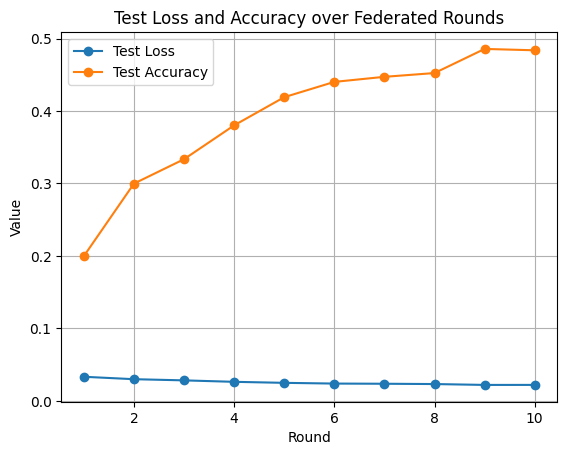

In [ ]:
rounds = range(1, 11)
plt.figure()
plt.plot(rounds, test_losses2, label='Test Loss', marker='o')
plt.plot(rounds, test_accuracies2, label='Test Accuracy', marker='o')
plt.title('Test Loss and Accuracy over Federated Rounds')
plt.xlabel('Round')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import copy
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Subset
from torchvision.models import vgg16  # Import VGG16 model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load VGG16 and modify for CIFAR-10 (10 classes instead of 1000)
from torchvision.models import resnet18
from torch.utils.data import DataLoader, Subset
import numpy as np
from torchvision.models import resnet18
model1 = resnet18(weights=None)  # Set weights to None for manual loading
model1.load_state_dict(torch.load('/content/resnet18-f37072fd.pth',weights_only=True))

class ResNet18CIFAR10(nn.Module):
    def __init__(self):
        super(ResNet18CIFAR10, self).__init__()
        self.resnet18 =model1 # Use the updated weights argument
        self.resnet18.fc = nn.Linear(self.resnet18.fc.in_features, 10)

    def forward(self, x):
        return self.resnet18(x)

model=ResNet18CIFAR10()
# class VGG16CIFAR10(nn.Module):
#     def __init__(self):
#         super(VGG16CIFAR10, self).__init__()
#         self.vgg16 = vgg16(pretrained=True)  # Load pre-trained VGG16
#         self.vgg16.classifier[6] = nn.Linear(4096, 10)  # Modify output layer for 10 classes (CIFAR-10)

#     def forward(self, x):
#         return self.vgg16(x)


def fed_avg(global_model, client_models, n_clients):
    global_dict = global_model.state_dict()
    for key in global_dict.keys():
        global_dict[key] = torch.stack([client_models[i].state_dict()[key].float() for i in range(n_clients)], 0).mean(0)
    global_model.load_state_dict(global_dict)
    return global_model

# Train model on client's data using weighted cross-entropy
def train(model, train_loader, class_weights, epochs=5, lr=0.01):
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    model.train()

    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset)
    return test_loss, accuracy





In [ ]:
test_losses1=[]
test_accuracies1=[]

100%|██████████| 170498071/170498071 [00:03<00:00, 48756416.18it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Client 1 class-wise counts:
Class 0: 4000 samples
Class 1: 4000 samples
Class 2: 4000 samples
Class 3: 4000 samples
Class 4: 4000 samples
Class 5: 5000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 samples
Class 9: 1000 samples


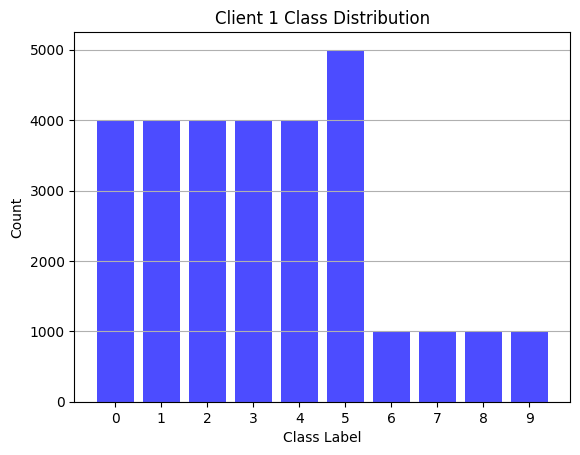


Client 2 class-wise counts:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 5000 samples
Class 6: 4000 samples
Class 7: 4000 samples
Class 8: 4000 samples
Class 9: 4000 samples


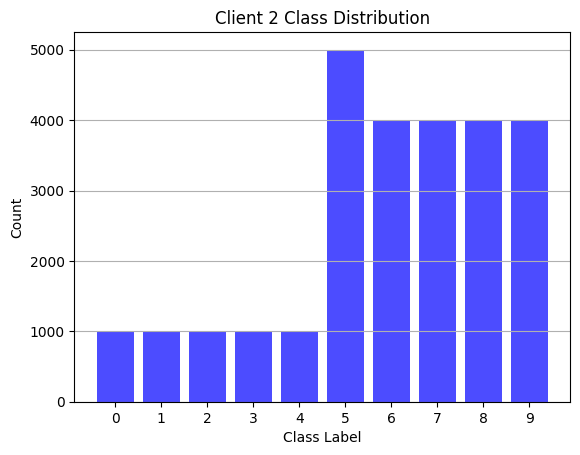


Client 3 class-wise counts:
Class 0: 4000 samples
Class 1: 4000 samples
Class 2: 4000 samples
Class 3: 4000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 1000 samples
Class 8: 1000 samples
Class 9: 1000 samples


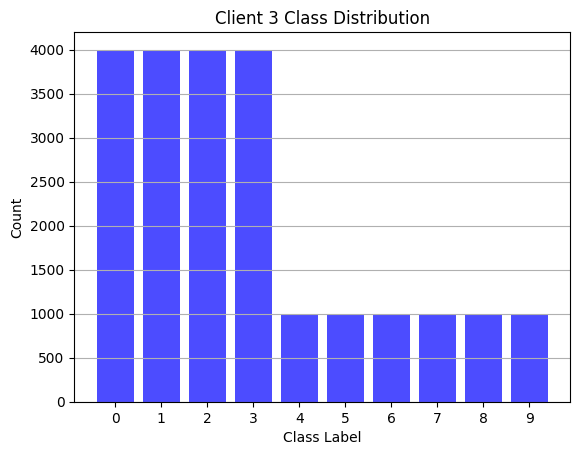


Client 4 class-wise counts:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 4000 samples
Class 5: 4000 samples
Class 6: 4000 samples
Class 7: 4000 samples
Class 8: 4000 samples
Class 9: 4000 samples


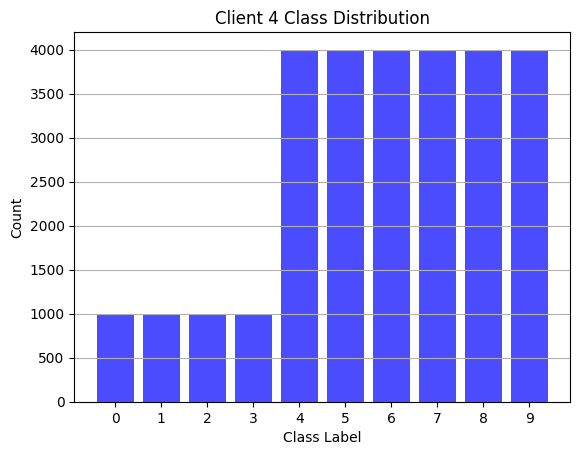


Client 5 class-wise counts:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Class 4: 1000 samples
Class 5: 1000 samples
Class 6: 1000 samples
Class 7: 4000 samples
Class 8: 4000 samples
Class 9: 4000 samples


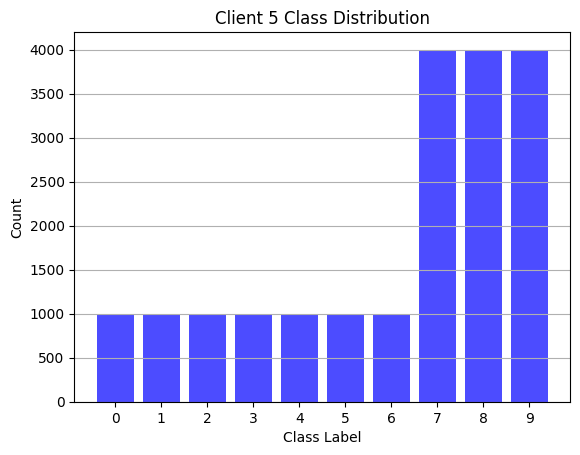


Round 1/5
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0136, Test Accuracy: 0.6978

Round 2/5
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0112, Test Accuracy: 0.7514

Round 3/5
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0104, Test Accuracy: 0.7735

Round 4/5
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0098, Test Accuracy: 0.7880

Round 5/5
Training client 1
Training client 2
Training client 3
Training client 4
Training client 5
Test Loss: 0.0098, Test Accuracy: 0.7946



In [ ]:
# Federated learning training loop with VGG16
def federated_learning():
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

    client_datasets = create_client_datasets(trainset)
    print_class_counts_and_plot(client_datasets, trainset)

    client_loaders = [data.DataLoader(dataset, batch_size=64, shuffle=True) for dataset in client_datasets]

    global_model = ResNet18CIFAR10()

    n_rounds = 5
    for round in range(n_rounds):
        print(f"Round {round + 1}/{n_rounds}")
        i = 0
        client_models = []
        for client_loader in client_loaders:
            print(f'Training client {i + 1}')
            client_model = copy.deepcopy(global_model)

            class_counts = np.bincount(np.array(client_loader.dataset.dataset.targets)[client_loader.dataset.indices], minlength=10)
            total_samples = len(client_loader.dataset)
            class_weights = total_samples / (len(class_counts) * class_counts)
            class_weights = torch.FloatTensor(class_weights).to(client_model.parameters().__next__().device)

            train(client_model, client_loader, class_weights, epochs=1)
            client_models.append(client_model)
            i += 1

        global_model = fed_avg(global_model, client_models, len(client_loaders))
        test_loader = data.DataLoader(testset, batch_size=64, shuffle=False)
        criterion = nn.CrossEntropyLoss()
        test_loss, accuracy = test(global_model, test_loader, criterion)
        test_losses1.append(test_loss)
        test_accuracies1.append(accuracy)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}\n")


if __name__ == "__main__":
    federated_learning()

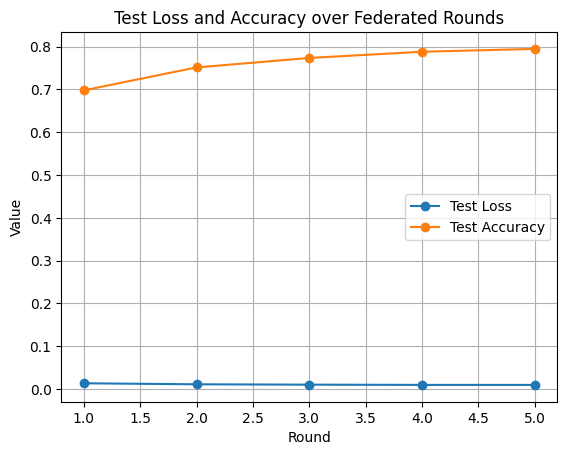

In [ ]:
rounds = range(1, 6)
plt.figure()
plt.plot(rounds, test_losses1, label='Test Loss', marker='o')
plt.plot(rounds, test_accuracies1, label='Test Accuracy', marker='o')
plt.title('Test Loss and Accuracy over Federated Rounds')
plt.xlabel('Round')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()